# Assignment 04

## Plotting the input data

In [1]:
import csv

train_data = []
test_data = []

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        train_data += [list(map(float, i))]
        

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        test_data += [list(map(float, i))]


load a set of data points $\{ (x^{(i)}, y^{(i)}, z^{(i)}, h^{(i)}) \}$ from the given CSV file ('data_train.csv') for training
load a set of data points $\{ (x^{(i)}, y^{(i)}, z^{(i)}, h^{(i)}) \}$ from the given CSV file ('data_test.csv') for testing

In [2]:
!pip install tqdm

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

# split data
x_train = train_data[:, 0:3]
y_train= train_data[:, 3:4]

x_test = test_data[:, 0:3]
y_test = test_data[:, 3:4]


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


split x, y data where  
$x = \{ (x^{(i)}, y^{(i)}, z^{(i)}) \}$  
$y = \{ (h^{(i)}) \}$  

In [3]:
from tqdm import tqdm

# Declare linear model
class Linear:
    def __init__(self, in_features):
        self.weight = np.random.normal(0, 0.01, 3)
        self.bias = np.zeros(1)

    def __call__(self, x: np.ndarray):
        return (self.weight * x).sum(axis=1, keepdims=True) + self.bias
    
def MSELoss(pred: np.ndarray, label: np.ndarray):
    return ((pred - label) ** 2).mean(dtype=np.float64)/2

epoch = 2000000
learning_rate = 1e-7

model = Linear(3)

losses = []
weights = []
biases = []
test_losses = []

for step in tqdm(range(1, epoch+ 1)):
    # MSELoss
    loss: np.ndarray = MSELoss(model(x_train), y_train)
    test_loss: np.ndarray = MSELoss(model(x_test), y_test)
    
    # Save losses and parameters
    losses += [loss.tolist()]
    weights += [model.weight.tolist()]
    biases += [model.bias.tolist()]
    test_losses += [test_loss.tolist()]
    
        
    # Backpropagation Loss
    error = model(x_train) - y_train
    
    # Gradient Descent Algorithm
    temp_bias = model.bias - learning_rate * error.mean()
    temp_weight = model.weight - learning_rate * (error * x_train).mean(axis=0)
    

    
    # Update parameter
    model.bias = temp_bias
    model.weight = temp_weight
    

    
losses = np.asarray(losses)
weights = np.asarray(weights)
biases = np.asarray(biases)



100%|█████████████████████████████████████████████████████████████████████| 2000000/2000000 [03:11<00:00, 10438.61it/s]


### Linear Model
$f_\theta(x, y, z) = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 z$, where $\theta = (\theta_0, \theta_1, \theta_2, \theta_3)$ and $\theta_0, \theta_1, \theta_2, \theta_3 \in \mathbb{R}$  
initial parameter is $\theta_0 = 0$ and $\theta_1, \theta_2, \theta_3$ iid $N(0, 0.01^2)$

### Objective function: MSELoss  
$J(\theta_0, \theta_1, \theta_2, \theta_3) = \frac{1}{2 m} \sum_{i=1}^m ( \theta_0 + \theta_1 x^{(i)} + \theta_2 y^{(i)} + \theta_3 z^{(i)} - h^{(i)} )^2$  

### Gradient Descent Algorithm  
$\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)})$  
$\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)}) x^{(i)}$  
$\theta_2^{(t+1)} := \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)}) y^{(i)}$  
$\theta_3^{(t+1)} := \theta_3^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (f_\theta(x^{(i)}, y^{(i)}, z^{(i)}) - h^{(i)}) z^{(i)}$  

initial learning rate is 1e-7 and 1000000 epoch

## Plot the estimated parameters using the training dataset

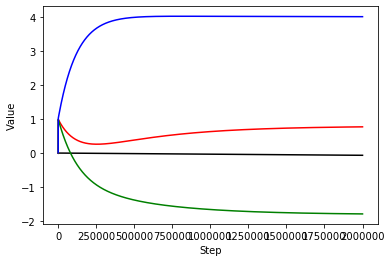

In [4]:
plt.plot(biases, color='black')
plt.plot(weights[:, 0], color='red')
plt.plot(weights[:, 1], color='green')
plt.plot(weights[:, 2], color='blue')
plt.xlabel('Step')
plt.ylabel('Value')
plt.show()

# Plot the training error using the training dataset

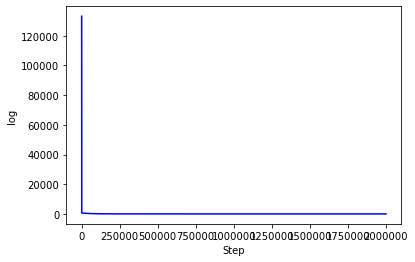

In [5]:
plt.plot(losses, 'b-')
plt.ylabel('log')
plt.xlabel('Step')
plt.show()

Plot energy surface $ (\theta_0, \theta_1, J(\theta_0, \theta_1)) $ with the range of variables $ \theta_0 = [-30, 30] $ and $ \theta_1 = [-30, 30] $  
$ J(\theta_0, \theta_1)) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $  

# Plot the testing error using the testing dataset

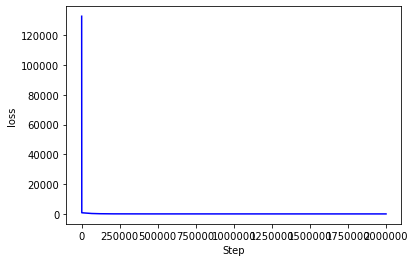

In [7]:
plt.plot(test_losses, 'b-')
plt.ylabel('loss')
plt.xlabel('Step')
plt.show()

## Plot train data and prediction


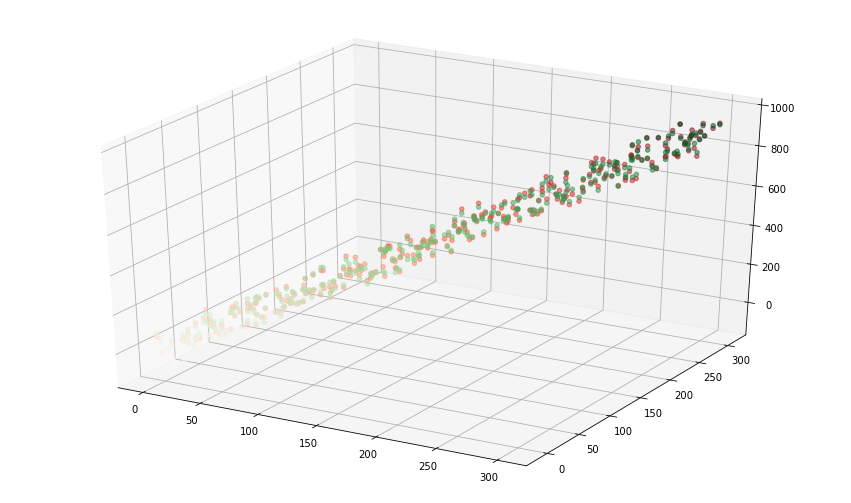

In [8]:
# theta from 0 and 300 step 1
theta_0 = np.arange(0, 300, 1)
theta_1 = np.arange(0, 300, 1) 

plt.figure(figsize=(15, 9))
ax = plt.axes(projection='3d')
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, c= x_train[:, 2], cmap=plt.get_cmap('Reds'), alpha=0.5)
ax.scatter(x_train[:, 0], x_train[:, 1], model(x_train), c = x_train[:, 2], cmap=plt.get_cmap('Greens'), alpha=0.5)

plt.show()

## Plot test data and prediction

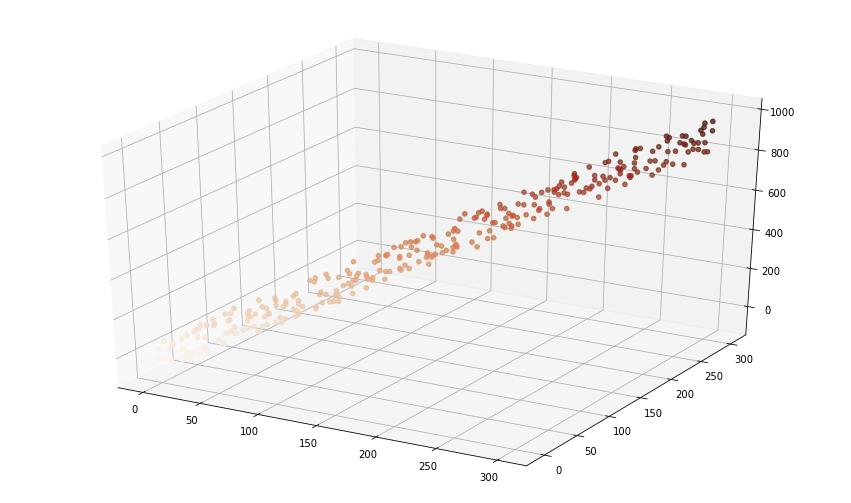

In [9]:
# theta from 0 and 300 step 1
theta_0 = np.arange(0, 300, 1)
theta_1 = np.arange(0, 300, 1) 

plt.figure(figsize=(15, 9))
ax = plt.axes(projection='3d')
ax.scatter(x_train[:, 0], x_test[:, 1], y_test, c= x_test[:, 2], cmap=plt.get_cmap('Reds'), alpha=0.5)
ax.scatter(x_train[:, 0], x_test[:, 1], model(x_test), c = x_test[:, 2], cmap=plt.get_cmap('Greens'), alpha=0.5)

plt.show()